# Statistical Data Analysis: Final Project
Student: Zsombor Malatinszki

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

from scipy.stats import zscore
from scipy.stats import chi2_contingency

One sentence deserves to be highlighted for later reference from the introductory description:

"Since there is no information about who rented the bikes, you can assume that each trip was made by a different person." -> independent/unpaired observations

As well as the description of the variables:

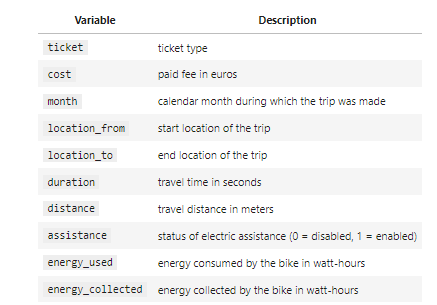


# 1. Data preparation

In [3]:
bikes_raw = pd.read_csv("bikes.data", header=0, sep=',')

In [4]:
bikes_raw

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1770,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0
1772,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


In [5]:
bikes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            1774 non-null   object 
 1   cost              1774 non-null   float64
 2   month             1774 non-null   int64  
 3   location_from     1774 non-null   object 
 4   location_to       1774 non-null   object 
 5   duration          1774 non-null   float64
 6   distance          1774 non-null   int64  
 7   assistance        1774 non-null   int64  
 8   energy_used       1774 non-null   float64
 9   energy_collected  1774 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 138.7+ KB


In [6]:
bikes_raw.describe()

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,7.233371,671.323563,2460.067644,0.916009,17.399493,5.639290
std,4.127344,1.720351,1141.708627,2352.529305,0.277452,17.194463,6.379593
min,0.000000,4.000000,2.000000,-3380.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,245.250000,910.000000,1.000000,1.425000,0.600000
50%,0.050000,7.000000,546.500000,2030.000000,1.000000,14.350000,3.900000
75%,0.550000,9.000000,877.750000,3605.000000,1.000000,26.900000,8.325000
max,100.000000,10.000000,25614.000000,20770.000000,1.000000,144.900000,56.400000


## Unique values and datatypes

In [7]:
for column in bikes_raw.columns:
    print("Unique values in " + str(column) + " column: " )
    print(bikes_raw[column].unique())

Unique values in ticket column: 
['single' 'savonia' 'season']
Unique values in cost column: 
[3.50e-01 1.20e+00 0.00e+00 3.00e-01 1.00e+00 7.00e-01 1.00e-01 4.00e-01
 5.00e-01 1.50e-01 2.00e-01 5.00e-02 6.00e-01 6.50e-01 2.50e-01 1.45e+00
 1.15e+00 5.50e-01 7.50e-01 1.00e+02 8.00e-01 4.50e-01 9.50e-01 1.05e+00
 1.30e+00 9.00e-01 8.50e-01 2.45e+00 1.75e+00 1.10e+00 1.60e+00 1.25e+00
 1.35e+00 2.00e+00 1.50e+00 4.25e+00 3.65e+00 1.55e+00 2.70e+00 2.90e+00
 4.35e+00 3.55e+00 1.70e+00 1.65e+00 1.40e+00 3.00e+00 4.10e+00 1.80e+00
 1.90e+00 4.45e+00 4.80e+00 4.00e+00 2.15e+00 2.20e+00 4.30e+00 3.70e+00]
Unique values in month column: 
[ 9  5 10  6  8  7  4]
Unique values in location_from column: 
['MICROTEKNIA' 'SATAMA' 'TASAVALLANKATU' 'TORI' 'NEULAMÄKI' 'KEILANKANTA'
 'PUIJONLAAKSO' 'KAUPPAKATU' 'KYS' 'PIRTTI']
Unique values in location_to column: 
['PUIJONLAAKSO' 'KEILANKANTA' 'NEULAMÄKI' 'KAUPPAKATU' 'TORI'
 'TASAVALLANKATU' 'MICROTEKNIA' 'SATAMA' 'PIRTTI' 'KYS']
Unique values in durati

Based on the values above, some of the columns, namely 'ticket', 'month', 'location_from', 'location_to', and 'assistance' columns should have a categorical datatype, as they take a finite amount of values. 'assistance' variable can also be interpreted as a boolean variable, as it only takes the values 0, 1.

In [8]:
cont_col = ["cost", "duration", "distance", "energy_used", "energy_collected"] 
cat_col = ["ticket", "month", "location_from", "location_to"]
bool_col = ["assistance"]

In [9]:
bikes_raw[cat_col] = bikes_raw[cat_col].astype('category')
bikes_raw[bool_col] = bikes_raw[bool_col].astype('bool')

In [10]:
bikes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            1774 non-null   category
 1   cost              1774 non-null   float64 
 2   month             1774 non-null   category
 3   location_from     1774 non-null   category
 4   location_to       1774 non-null   category
 5   duration          1774 non-null   float64 
 6   distance          1774 non-null   int64   
 7   assistance        1774 non-null   bool    
 8   energy_used       1774 non-null   float64 
 9   energy_collected  1774 non-null   float64 
dtypes: bool(1), category(4), float64(4), int64(1)
memory usage: 79.3 KB


In [11]:
bikes_raw['month'].sort_values().unique()

[4, 5, 6, 7, 8, 9, 10]
Categories (7, int64): [4, 5, 6, 7, 8, 9, 10]

It's also interesting to see that the month column only contains months from 4-10.

It also seems that there are no spelling mistakes, nor any missing values. The categorical values seem to be complete and need no correction.

## Negative distance

In [12]:
bikes_raw[bikes_raw['distance']<0]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
23,single,0.15,5,TASAVALLANKATU,TASAVALLANKATU,138.0,-150,True,0.2,0.0
60,season,0.00,8,MICROTEKNIA,MICROTEKNIA,41.0,-20,True,0.0,0.0
62,single,0.10,8,KEILANKANTA,KEILANKANTA,73.0,-30,True,0.0,0.0
96,single,0.05,5,TORI,TORI,48.0,-10,True,0.0,0.0
125,savonia,0.00,10,KAUPPAKATU,KAUPPAKATU,48.0,-20,True,0.0,0.0
242,savonia,0.00,10,TORI,KAUPPAKATU,207.0,-180,True,3.3,0.0
284,single,0.15,4,KAUPPAKATU,KAUPPAKATU,178.0,-50,True,0.2,0.0
295,season,0.00,8,KAUPPAKATU,KAUPPAKATU,79.0,-60,True,0.0,0.0
318,single,0.45,8,KYS,PUIJONLAAKSO,480.0,-880,True,0.0,0.0
322,savonia,0.00,10,KYS,KYS,70.0,-10,True,0.0,0.0


In [13]:
len(bikes_raw[bikes_raw['distance']<0])

39

There seem to be many rows where the distance is a negative number, which is clearly incorrect. It could be assumed that the negative sign is just a bug, and the values themselves without the negative sings could be kept. However, I have no information supporting this assumption, and looking at the other variables in these rows, in almost all cases, electric assistance was used with these bikes, yet no energy was used. As these rows seem to contain unreliable data, it is best to discard them (there are not many).

In [14]:
bikes_raw = bikes_raw[bikes_raw['distance']>=0]

In [15]:
len(bikes_raw)

1735

## Duplicate rows

I have also found that some rows are duplicates. In fact, there are 10 of these rows.

In [16]:
sum(bikes_raw.duplicated())

10

In [17]:
bikes_raw = bikes_raw[~bikes_raw.duplicated()]
len(bikes_raw)

1725

## Data visualization

In [18]:
bikes_raw[bikes_raw['duration'] == bikes_raw['duration'].max()]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
100,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,False,0.0,3.6


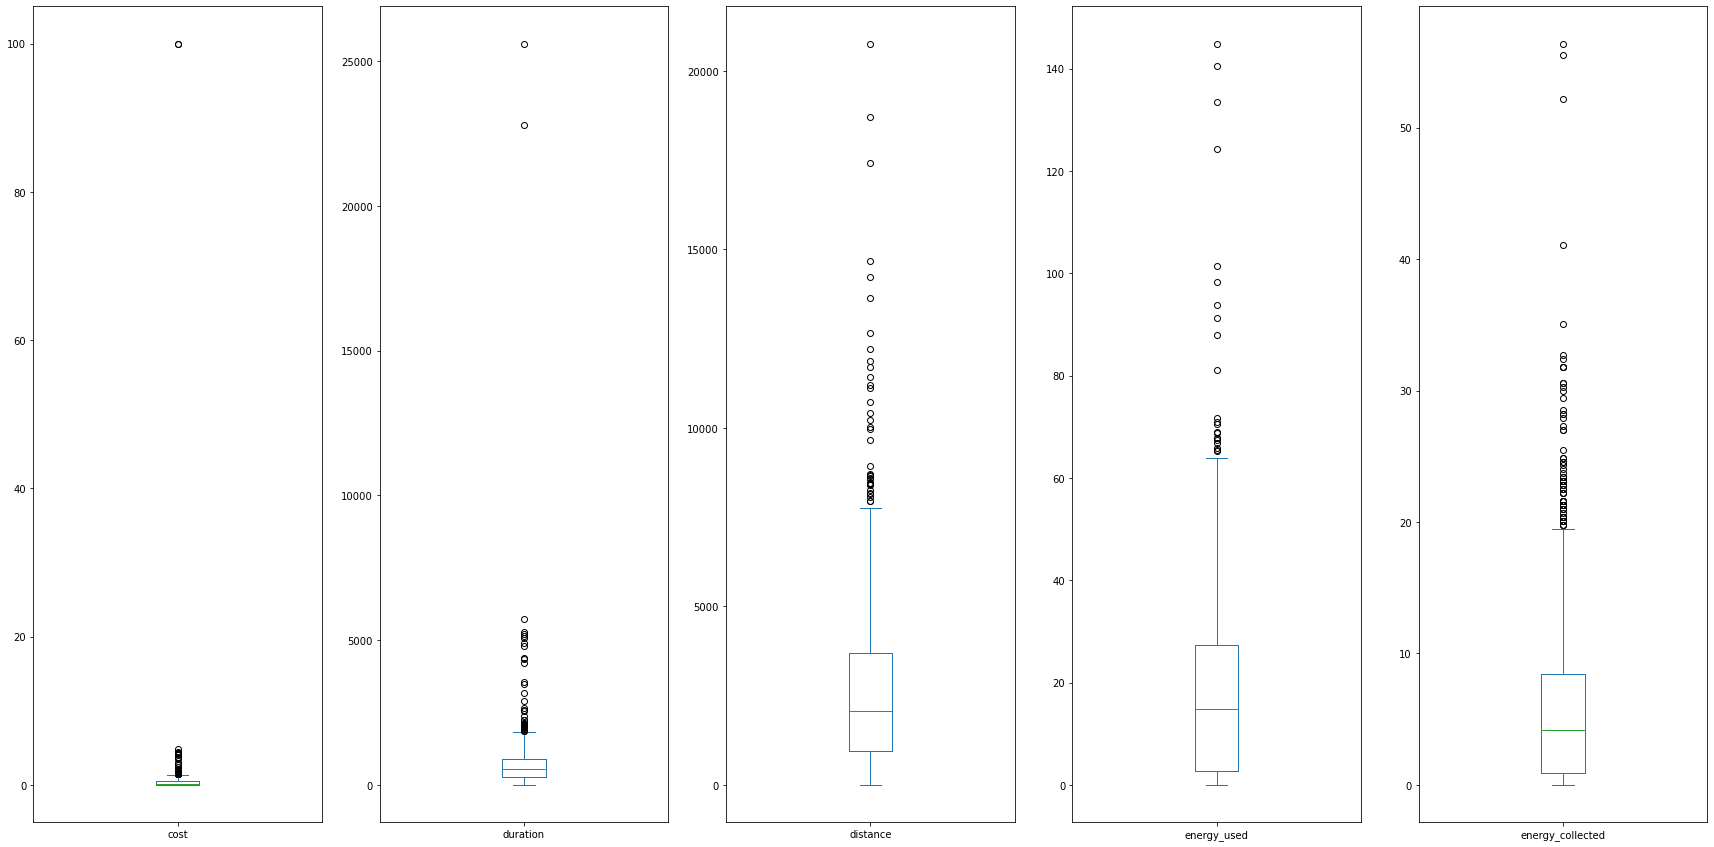

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 15))

i = 0
for col in cont_col:
    bikes_raw[col].plot.box(ax=axes[i])
    i = i+1

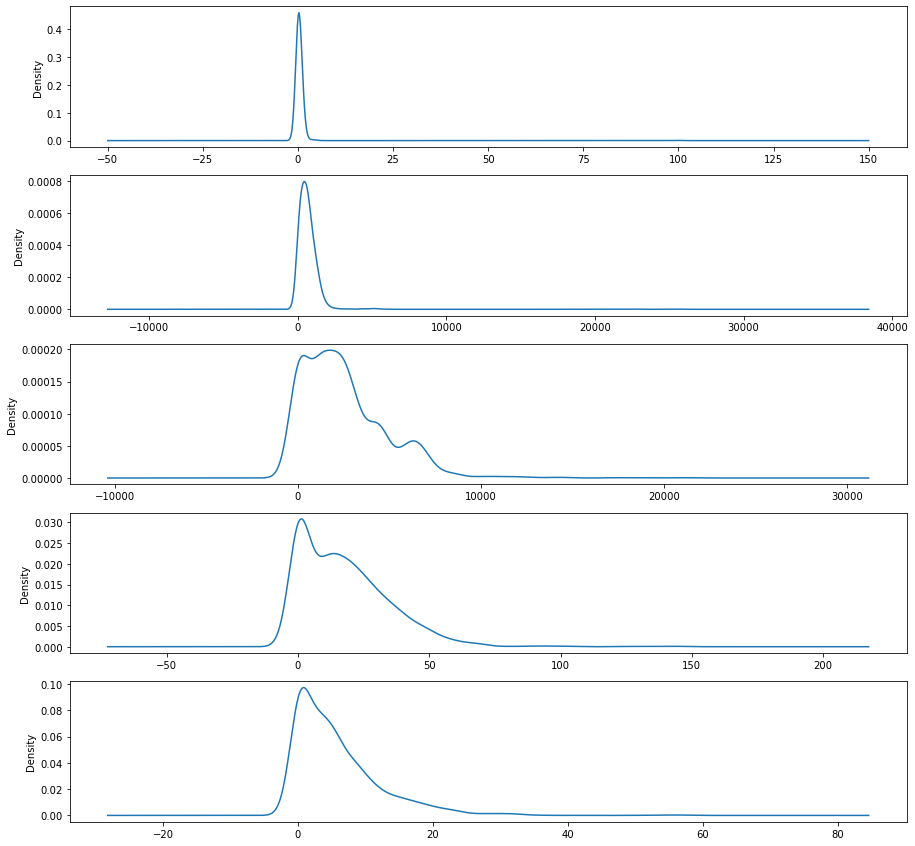

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

i = 0
for col in cont_col:
    bikes_raw[col].plot(kind='density', ax=axes[i])
    i = i+1


In [21]:
for col in bikes_raw[cont_col].columns:
    stat, p = stats.shapiro(bikes_raw[col])
    if p > 0.05:
        print("Data may be normally distributed")
    else:
        print("Data is not normally distributed")

Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed
Data is not normally distributed


The distribution of our continous variables is fairly skewed, with most values being near zero (or at similar low values), with a lot of extreme cases. 

In [22]:
bikes_raw.reset_index(drop=True, inplace=True)

## Null distance

"The data may therefore contain irrelevant records, such as customers only trying out how bikes can be rented with our Android app and cancelling the transaction without actually riding the bike." This can be interpreted that the rows where the distance travelled is 0 should be discarded according to the instructions, as the bikes weren't actually used. This makes sense, as most of the variables don't hold any valuable information if the bike was not used. 

In [23]:
bikes_0_dist = bikes_raw[bikes_raw['distance'] == 0]
bikes_0_dist

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
9,savonia,0.00,9,TORI,TORI,5.0,0,False,0.0,0.0
13,single,0.10,5,TORI,TORI,64.0,0,True,0.0,0.0
14,single,0.10,5,KEILANKANTA,KEILANKANTA,86.0,0,True,0.0,0.0
18,season,0.00,6,TORI,TORI,233.0,0,True,0.0,0.0
21,season,0.00,6,TASAVALLANKATU,TASAVALLANKATU,38.0,0,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1674,single,0.05,5,TORI,TORI,59.0,0,True,0.0,0.0
1690,season,0.00,7,TORI,TORI,8.0,0,True,0.0,0.0
1694,season,0.00,8,MICROTEKNIA,MICROTEKNIA,79.0,0,True,0.0,0.0
1703,single,0.10,7,KYS,KYS,109.0,0,False,0.0,0.0


However, as there are many rows containing 0 distance, some minimal information could still be gained using the "month" variable, for example, a pattern could be seen as to which months users are more likely to try out the app.

In [24]:
trials_per_month = bikes_0_dist.groupby('month')['ticket'].count()

<AxesSubplot:xlabel='month'>

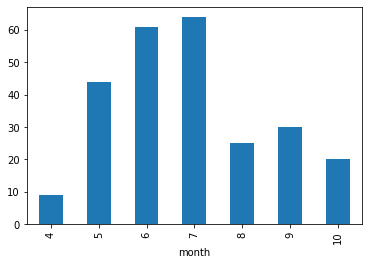

In [25]:
trials_per_month.plot.bar()

In [26]:
bikes_raw = bikes_raw.drop(bikes_0_dist.index, axis=0)
bikes_raw

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,True,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,True,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,True,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,True,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,True,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1719,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,True,34.3,3.0
1720,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,True,8.0,2.7
1721,single,0.20,7,TORI,SATAMA,199.0,930,True,3.7,3.6
1723,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,True,36.5,6.9


In [27]:
bikes_raw.reset_index(drop=True, inplace=True)

## Electric assistance

Another aspect worth considering is that when electric assistance is used, one would also expect energy to be used.

In [28]:
bikes_raw[ (bikes_raw["assistance"] == True) & (bikes_raw["energy_used"] == 0) ]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
155,single,0.10,7,NEULAMÄKI,NEULAMÄKI,101.0,10,True,0.0,0.0
209,single,0.10,7,PUIJONLAAKSO,PUIJONLAAKSO,66.0,30,True,0.0,0.0
259,savonia,0.00,9,TORI,TORI,112.0,130,True,0.0,0.0
306,single,0.05,7,TORI,TORI,57.0,10,True,0.0,0.0
415,single,0.05,6,SATAMA,SATAMA,59.0,80,True,0.0,0.0
774,season,0.00,6,TASAVALLANKATU,TASAVALLANKATU,67.0,10,True,0.0,0.0
787,single,1.05,6,TORI,PUIJONLAAKSO,1214.0,10,True,0.0,0.0
846,season,0.00,9,KEILANKANTA,KEILANKANTA,74.0,10,True,0.0,0.0
864,season,0.00,6,TORI,TORI,197.0,60,True,0.0,0.0
907,single,1.20,9,KEILANKANTA,TASAVALLANKATU,1408.0,4400,True,0.0,0.0


However, without more context, it is hard to tell whether these are invalid rows or not. Most of these trips had very short durations, and for the ones with longer durations, an explanation could be that perhaps they were all downhill trips. As I do not have enough information to discard these rows, I chose to keep them.

In [29]:
bikes_raw[ (bikes_raw["assistance"] == False) & (bikes_raw["energy_used"] > 0) ]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
188,single,0.10,7,TASAVALLANKATU,TASAVALLANKATU,61.0,1300,False,9.0,11.1
500,season,0.00,10,PIRTTI,PIRTTI,1795.0,1880,False,12.1,2.7
1130,savonia,0.00,10,TORI,TORI,8.0,190,False,1.5,0.6
1200,single,0.55,7,TORI,PUIJONLAAKSO,611.0,2590,False,25.4,3.3


In [30]:
bikes_raw["energy_used"].median()

18.1

Another case worth looking at is when there was no assistance used according to the data, yet energy was used. Once again I am unsure as to whether this is because of erroneous data collection, or perhaps the specifics of how the bikes work, such as the lights using energy from the battery if the speed of travel is not sufficient.
In the end, I could not think of any plausible and probable explanation as to how the energy used could take positive values when the assistance is off, so I chose to discard these rows (as there are not many).

In [31]:
false_assistance = bikes_raw[ (bikes_raw["assistance"] == False) & (bikes_raw["energy_used"] > 0) ].index
false_assistance

Int64Index([188, 500, 1130, 1200], dtype='int64')

In [32]:
bikes_raw = bikes_raw.drop(false_assistance)
bikes_raw

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,True,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,True,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,True,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,True,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,True,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1467,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,True,34.3,3.0
1468,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,True,8.0,2.7
1469,single,0.20,7,TORI,SATAMA,199.0,930,True,3.7,3.6
1470,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,True,36.5,6.9


In [33]:
bikes_raw.reset_index(drop=True, inplace=True)

## Outlier detection with IQR

Originally I used the z-score to find outliers, but upon some research, I have found that IQR is more suitable for skewed non normal data.

In [34]:
#https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-3.0*IQR)) | (df>(q3+3.0*IQR)))]

    return outliers

In [35]:
iqr_pd = pd.Series()
for col in cont_col:
    iqr_pd = pd.concat([iqr_pd, find_outliers_IQR(bikes_raw[col])], axis=0, ignore_index = False)
iqr_pd

C:\Users\zsmal\AppData\Local\Temp\ipykernel_16816\597598505.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  iqr_pd = pd.Series()


78        100.00
166         2.45
405         4.25
457         3.65
492         2.70
524         2.90
533         4.35
574         3.55
900         3.00
987         4.10
1011      100.00
1176        4.45
1236        4.80
1360        4.00
1454        4.30
1462        3.70
78      25614.00
166      2905.00
405      5078.00
457      4345.00
492      3185.00
524      3474.00
533      5214.00
574      4207.00
900      3545.00
987      4911.00
1011    22793.00
1176     5285.00
1236     5722.00
1360     4793.00
1454     5136.00
1462     4400.00
457     14240.00
574     17410.00
900     13650.00
987     20770.00
1011    14690.00
1454    18720.00
351        93.70
457       140.60
574       144.90
987       124.20
1292      101.50
1360       98.30
1454      133.40
129        31.80
351        32.70
457        31.80
574        56.40
691        30.30
900        35.10
968        30.60
987        52.20
1004       31.80
1198       30.60
1279       32.40
1296       41.10
1360       55.50
dtype: float64

In [36]:
iqr_pd_indexes = iqr_pd.keys().unique().tolist()
iqr_pd_indexes

[78,
 166,
 405,
 457,
 492,
 524,
 533,
 574,
 900,
 987,
 1011,
 1176,
 1236,
 1360,
 1454,
 1462,
 351,
 1292,
 129,
 691,
 968,
 1004,
 1198,
 1279,
 1296]

In [37]:
bikes_no_outliers = bikes_raw.drop(iqr_pd_indexes, axis=0)
bikes_no_outliers.reset_index(drop=True, inplace=True)

bikes_outliers = bikes_raw.iloc[iqr_pd_indexes]
bikes_outliers.reset_index(drop=True, inplace=True)

In [38]:
print(len(bikes_raw))
print(len(bikes_no_outliers))
print(len(bikes_outliers))

1468
1443
25


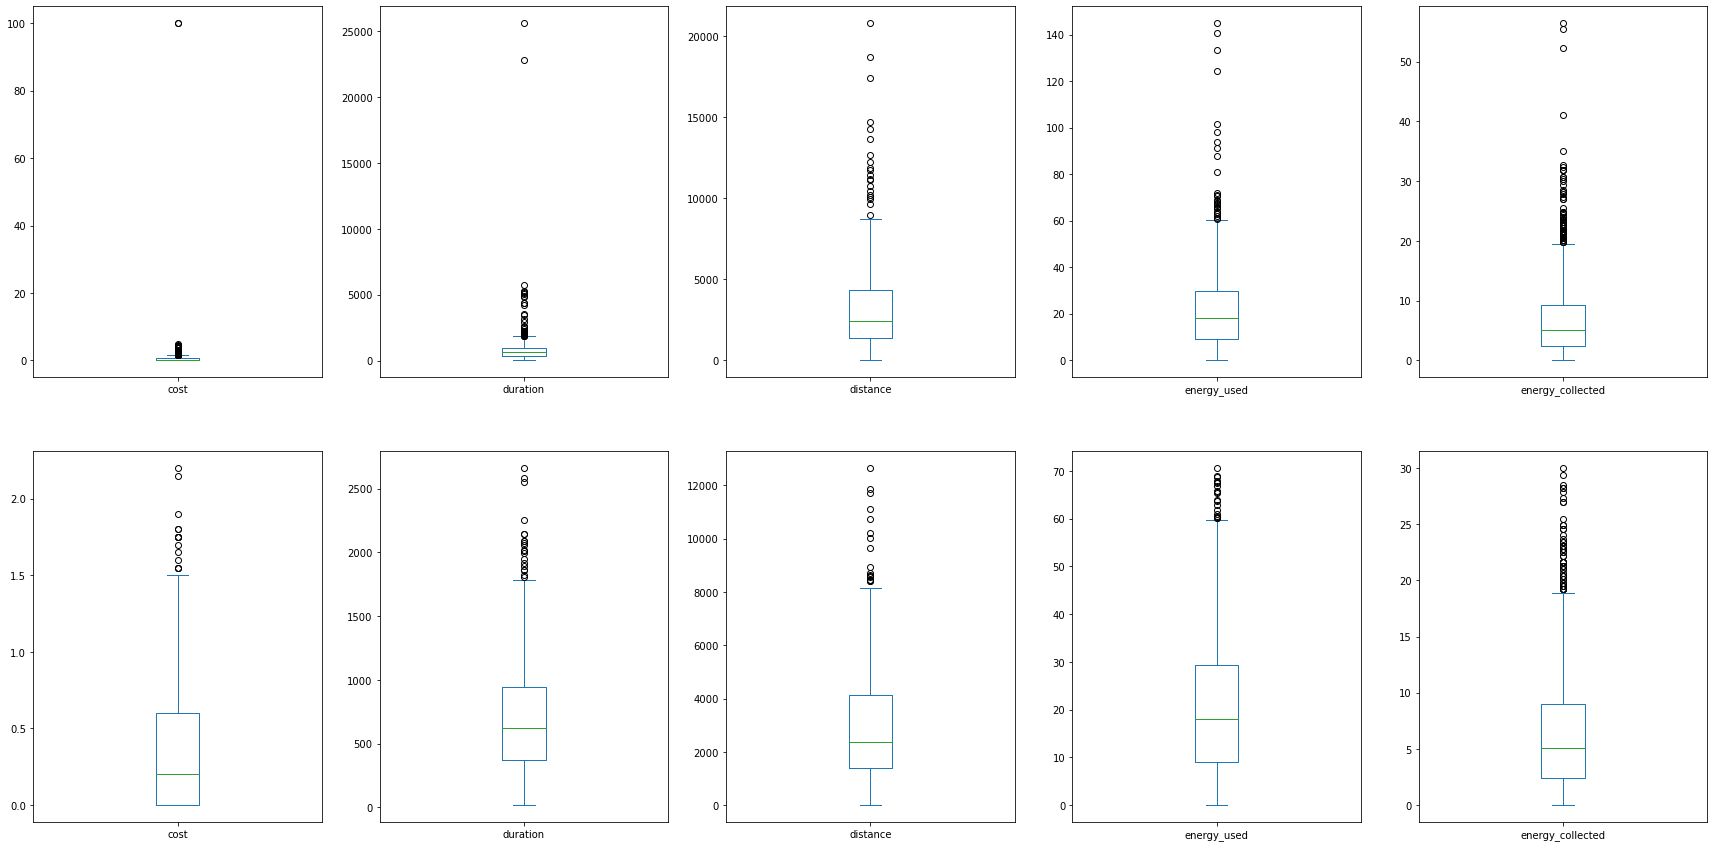

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 15))


j = 0
for col in cont_col:
    bikes_raw[col].plot.box(ax=axes[0, j])
    j = j+1

i = 0
for col in cont_col:
    bikes_no_outliers[col].plot.box(ax=axes[1, i])
    i = i+1

With the above few cells, the extreme positive outliers (+ IQR * 3, positive only because negative outliers aren't really present if we take the domain of our data into account) are identified. However, the question arises whether these data points are true outliers or not, and whether they should be discarded or taken into account. 

In [40]:
bikes_outliers

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,savonia,100.00,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,False,0.0,3.6
1,single,2.45,5,KEILANKANTA,KEILANKANTA,2905.0,2340,True,24.2,14.4
2,single,4.25,9,TORI,KAUPPAKATU,5078.0,9970,True,81.0,20.4
3,single,3.65,8,KEILANKANTA,KAUPPAKATU,4345.0,14240,True,140.6,31.8
4,single,2.70,6,TORI,KEILANKANTA,3185.0,7560,True,59.7,18.3
5,single,2.90,7,SATAMA,TORI,3474.0,5790,True,51.5,10.2
6,single,4.35,6,TORI,TORI,5214.0,8680,True,71.8,20.1
7,single,3.55,6,PUIJONLAAKSO,PUIJONLAAKSO,4207.0,17410,True,144.9,56.4
8,single,3.00,7,KAUPPAKATU,KAUPPAKATU,3545.0,13650,True,88.0,35.1
9,single,4.10,8,NEULAMÄKI,NEULAMÄKI,4911.0,20770,True,124.2,52.2


Upon inspection of the outliers, I have found no evidence to think that these observations would be the result of errors or incorrect data recordings, as for each variable in these rows seems to take an acceptable possible value. These rows generally seem to be from longer distance trips with long duration, and almost all have used the electric assistance, with the amount of energy that was used surpassing the generated amount. The perhaps only strange row is #0, which has not used the electrical assistance, has travelled a great distance, and yet has generated a rather (comparably) low amount of energy. However, the duration of #0 also takes an extreme value, perhaps meaning that the person was cycling at a very slow pace. Regardless of the possible explanations, I do not have the context to deem this row invalid, so I chose to keep it.

Perhaps it is best to keep the data in multiple forms: they should be separated to two different sets of data, extreme users, and regular ones (in case this came in handy at some questions), as well as keeping the whole dataset with all users (as I have found them to be true outliers).

In [41]:
bikes_df = bikes_raw
bikes_df
#bikes_no_outliers
#bikes_outliers

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,True,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,True,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,True,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,True,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,True,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1463,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,True,34.3,3.0
1464,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,True,8.0,2.7
1465,single,0.20,7,TORI,SATAMA,199.0,930,True,3.7,3.6
1466,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,True,36.5,6.9


## Z-score

This is just leftover code from when I used the z-score, this section can be ignored.

In [42]:
#z_score = bikes_raw[cont_col].apply(zscore)

In [43]:
#for col in cont_col:
#    print(z_score[(z_score[col]>3) | (z_score[col]<(-3))])
#    print(len(z_score[(z_score[col]>3) | (z_score[col]<(-3))]))
#    print("\n")

In [44]:
#cost_outliers = z_score[(z_score['cost']>3) | (z_score['cost']<(-3))].index
#cost_outlier_rows = bikes_raw.loc[cost_outliers]

#dur_outliers = z_score[(z_score['duration']>3) | (z_score['duration']<(-3))].index
#dur_outlier_rows = bikes_raw.loc[dur_outliers]

#dist_outliers = z_score[(z_score['distance']>3) | (z_score['distance']<(-3))].index
#dist_outlier_rows = bikes_raw.loc[dist_outliers]

#uenergy_outliers = z_score[(z_score['energy_used']>3) | (z_score['energy_used']<(-3))].index
#uenergy_outlier_rows = bikes_raw.loc[uenergy_outliers]

#cenergy_outliers = z_score[(z_score['energy_collected']>3) | (z_score['energy_collected']<(-3))].index
#cenergy_outlier_rows = bikes_raw.loc[cenergy_outliers]

In [45]:
#outlier_rows = pd.concat([cost_outlier_rows, dur_outlier_rows, dist_outlier_rows, uenergy_outlier_rows, cenergy_outlier_rows], axis=0, ignore_index=False)

In [46]:
#outlier_rows

In [47]:
#bikes_outliers = bikes_raw.drop(outlier_rows.index, axis=0)

In [48]:
#bikes_outliers

In [49]:
#fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 15))


#j = 0
#for col in cont_col:
#    bikes_raw[col].plot.box(ax=axes[0, j])
#    j = j+1

#i = 0
#for col in cont_col:
#    bikes_outliers[col].plot.box(ax=axes[1, i])
#    i = i+1

# 2. Data exploration

### Q1
"For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers."

In [50]:
def ticket_summary(df):
    df_g = df.groupby("ticket")
    r = []
    
    r.append(df_g["cost"].count())
    r.append(df_g["distance"].sum())
    r.append(df_g["duration"].sum())
    r.append(df_g["cost"].sum())
    
    return r

In [51]:
print("Number of trips made per ticket type:\n")
ticket_summary(bikes_df)[0]

Number of trips made per ticket type:



ticket
savonia    216
season     451
single     801
Name: cost, dtype: int64

In [52]:
print("Total distance travelled per ticket type:\n")
ticket_summary(bikes_df)[1]

Total distance travelled per ticket type:



ticket
savonia     494960
season     1308100
single     2556910
Name: distance, dtype: int64

In [53]:
print("Total time travelled per ticket type:\n")
ticket_summary(bikes_df)[2]

Total time travelled per ticket type:



ticket
savonia    162998.0
season     312584.0
single     654028.0
Name: duration, dtype: float64

In [54]:
print("Total amount of fees paid per ticket type:\n")
ticket_summary(bikes_df)[3]

Total amount of fees paid per ticket type:



ticket
savonia    102.0
season       3.0
single     646.5
Name: cost, dtype: float64

We can see that most commonly people use single tickets to use the company's bikes, having more trips per this ticket type than the other 2 combined. The same can be said about the total distance travelled and the duraction, with the single tickets surpassing the combined values of both the savonia and season ticket types. In general, season tickets were used about twice as many times as savonia tickets. We can also observe that the savonia ticket users had the least duration and distance travelled by a sizable margin.

As for the fees, the single ticket type has brought the most revenue. It is interesting to observe how small fees the season ticket type has, but perhaps this is due to having to buy season type tickets as a "one-time-sum". Overall the ratio of -total fees divided by the total distance or total time travelled- is in favor of single tickets.

### Q2
 "For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time."

In [55]:
bikes_pivot = bikes_df.pivot_table(index='month', columns='ticket', values='distance', aggfunc='sum')
bikes_pivot

ticket,savonia,season,single
month,,,
4,0,30680,34290
5,0,256720,494500
6,0,244780,710240
7,0,268150,585500
8,0,214490,357890
9,240790,184840,240370
10,254170,108440,134120


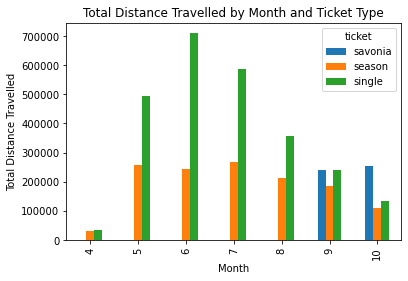

In [56]:
bikes_pivot.plot(kind='bar', stacked=False)
plt.title('Total Distance Travelled by Month and Ticket Type')
plt.xlabel('Month')
plt.ylabel('Total Distance Travelled')
plt.show()

In general for both the single and the season ticket types it can be observed that significant distance starts from May and reaches a peak volume in June, and then gradually decreases in the fall towards the winter months.

Interestingly the savonia type tickets only start from September, and the total distance travelled increses in October (perhaps this type of ticket was introduced in September?).

### Q3
"Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated."

In [57]:
(bikes_df["location_from"].unique().sort_values()) == (bikes_df["location_to"].unique().sort_values())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [58]:
locations = bikes_df["location_from"].unique().tolist()

In [59]:
net_traffic = {}
for location in locations:
    b = bikes_df[bikes_df["location_to"] == location].count()[0]
    a = bikes_df[bikes_df["location_from"] == location].count()[0]
    c = a-b
    net_traffic[location] = c
net_traffic

{'MICROTEKNIA': 9,
 'SATAMA': 38,
 'TASAVALLANKATU': -12,
 'TORI': 11,
 'NEULAMÄKI': 0,
 'KEILANKANTA': 10,
 'PUIJONLAAKSO': -29,
 'KAUPPAKATU': -42,
 'KYS': 17,
 'PIRTTI': -2}

In [60]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_net_traffic = dict(sorted(net_traffic.items(), key=lambda item: item[1]))
sorted_net_traffic 

{'KAUPPAKATU': -42,
 'PUIJONLAAKSO': -29,
 'TASAVALLANKATU': -12,
 'PIRTTI': -2,
 'NEULAMÄKI': 0,
 'MICROTEKNIA': 9,
 'KEILANKANTA': 10,
 'TORI': 11,
 'KYS': 17,
 'SATAMA': 38}

In [61]:
first_3 = dict(list(sorted_net_traffic .items())[:3])
last_3 = dict(list(sorted_net_traffic .items())[-3:])

In [62]:
first_3

{'KAUPPAKATU': -42, 'PUIJONLAAKSO': -29, 'TASAVALLANKATU': -12}

The 3 stations with the biggest deficit of bikes are KAUPPAKATU, PUIJONLAAKSO and TASAVALLANKATU stations.

In [63]:
last_3

{'TORI': 11, 'KYS': 17, 'SATAMA': 38}

The 3 stations with the biggest surplus of bikes are SATAMA, KYS and TORI stations.

Perhaps a solution would be to move some of the surplus bikes from: <br>
SATAMA -> KAUPPAKATU <br>
KYS -> PUIJONLAAKSO <br>
TORI -> TASAVALLANKATU

### Q4
"For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips."

In [64]:
bikes_df["net_energy_gain"] = bikes_df["energy_collected"] - bikes_df["energy_used"]

In [65]:
bikes_df

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,net_energy_gain
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,True,19.0,2.7,-16.3
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,True,53.8,15.3,-38.5
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,True,43.0,9.9,-33.1
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,True,6.5,2.1,-4.4
4,single,0.30,9,TORI,TORI,319.0,1120,True,13.7,1.2,-12.5
...,...,...,...,...,...,...,...,...,...,...,...
1463,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,True,34.3,3.0,-31.3
1464,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,True,8.0,2.7,-5.3
1465,single,0.20,7,TORI,SATAMA,199.0,930,True,3.7,3.6,-0.1
1466,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,True,36.5,6.9,-29.6


(array([  2.,   0.,   3.,   0.,   1.,   9.,  16.,  56.,  94., 180., 272.,
        362., 351., 109.,  13.]),
 array([-111.2       , -102.40666667,  -93.61333333,  -84.82      ,
         -76.02666667,  -67.23333333,  -58.44      ,  -49.64666667,
         -40.85333333,  -32.06      ,  -23.26666667,  -14.47333333,
          -5.68      ,    3.11333333,   11.90666667,   20.7       ]),
 <BarContainer object of 15 artists>)

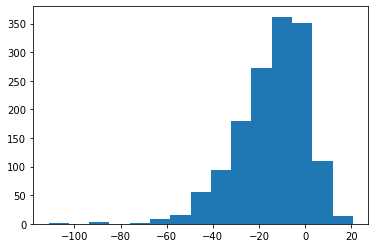

In [66]:
plt.hist(bikes_df["net_energy_gain"], 15)

In [67]:
bikes_df["net_energy_gain"].sum()

-20790.3

During trips, the net change in energy is negative in the majority of occasions (change is commonly between 0 to -30).

# 3. Hypothesis testing

### Q1
"Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers."

In [75]:
single_distance = bikes_df[ bikes_df["ticket"] == "single" ]["distance"]

In [76]:
season_distance = bikes_df[ bikes_df["ticket"] == "season" ]["distance"]

In [77]:
stat, p = stats.shapiro(single_distance)
if p > 0.05:
    print("Data may be normally distributed")
else:
     print("Data is not normally distributed")

Data is not normally distributed


In [78]:
stat, p = stats.shapiro(season_distance)
if p > 0.05:
    print("Data may be normally distributed")
else:
     print("Data is not normally distributed")

Data is not normally distributed


As the datasets are not normally distributed, and they are unpaired -> Mann-Whitney U test should be used.

In [80]:
p_dist = sp.stats.mannwhitneyu(single_distance,season_distance,use_continuity=True,alternative='two-sided')[1]
print("p-value: " + str(p_dist))
if p_dist > 0.05:
    print("Datasets are not significantly different")
else:
    print("Datasets are significantly different")

p-value: 0.13848743696825913
Datasets are not significantly different


As the p-value is higher than 0.05, there is no statistical evidence to claim that the travel times tend to be different for customers with the single ticket type than for the customers with the season ticket type.

### Q2
"Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers."

In [84]:
stat, p = stats.shapiro(bikes_df["distance"])
if p > 0.05:
    print("Data may be normally distributed")
else:
     print("Data is not normally distributed")

Data is not normally distributed


In [85]:
stat, p = stats.shapiro(bikes_df["energy_used"])
if p > 0.05:
    print("Data may be normally distributed")
else:
     print("Data is not normally distributed")

Data is not normally distributed


As the data is not normally distributed, Spearman correlation should be used.

In [91]:
spearman = stats.spearmanr(bikes_df["distance"],bikes_df["energy_used"])
print("r= " + str(spearman[0]) + " p= " + str(spearman[1]))
if spearman[1] > 0.05:
    print("Not linearly significant")
else:
    print("Linearly significant")

r= 0.827321307562592 p= 0.0
Linearly significant


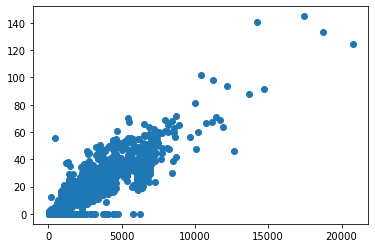

<Figure size 720x1080 with 0 Axes>

In [104]:
plt.scatter(bikes_df["distance"], bikes_df["energy_used"])
plt.figure(figsize=(10,15))
plt.show()

There is strong statistical evidence that there is a high positive correlation between the distance travelled and the energy used during a trip. From this we could also assume that those customers who travel long distances are likely to use electrical assistance.

### Q3
"Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers."

In [131]:
assistance_savonia = bikes_df[bikes_df["ticket"] == "savonia"]["assistance"]
assistance_savonia = assistance_savonia.rename("Savonia")

In [139]:
assistance_single = bikes_df[bikes_df["ticket"] == "single"]["assistance"]
assistance_single = assistance_single.rename("Single")

In [140]:
assistance_season = bikes_df[bikes_df["ticket"] == "season"]["assistance"]
assistance_season = assistance_season.rename("Season")

The values of the "assistance" variable are boolean, but they can be considered as categorical variables -> Pearson's chi-squared test can be used.

In [141]:
data_freq = [assistance_savonia.value_counts(), assistance_single.value_counts(), assistance_season.value_counts()]
data_freq

[True     188
 False     28
 Name: Savonia, dtype: int64,
 True     755
 False     46
 Name: Single, dtype: int64,
 True     435
 False     16
 Name: Season, dtype: int64]

In [142]:
df_freq = pd.DataFrame(data=data_freq)
df_freq = df_freq.transpose()
df_freq

,Savonia,Single,Season
True,188,755,435
False,28,46,16


In [143]:
sp.stats.chi2_contingency(df_freq)[1]

1.0342530983545507e-05

In [144]:
print("p value is " + str(sp.stats.chi2_contingency(df_freq)[1]))
if p <= 0.5:
    print('There is a significant difference')
else:
    print('There is no significant difference')

p value is 1.0342530983545507e-05
There is a significant difference


The p-value is less than 0.05, which means there is statistical evidence to claim that the "savonia" ticket type differs from the others with respect to how often the electric assistance is used. We could conclude that those customers with the "savonia" ticket type are more likely to use electric assistance.

# 4. Future directions
"Choose either (A) or (B) below.

(A) Formulate your own hypothesis about the use of rental electric bikes. Explain why your hypothesis would be important to explore. Describe how the hypothesis could be tested. (You do not have to perform the analysis.)

(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis."

Option (B): <br>
" Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated." <br>
<br>
I believe to properly have this data answered, it would be necessary to have data about the exact time of arrivals and departures. With the current data, I could at best create an analysis for each month only, but even that wouldn't be too helpful if indeed there are some stations that struggle to maintain a decent number of bikes. To derive meaningful information, and to make sure that there are enough bikes at each station at all times, it would be useful to record the day of renting as well in future data collections. With that data, the fluctuation of available bikes could be modelled and forecasted more accurately. As of now, we just have an idea of which stations struggle with maintaining enough bikes, but we don't really know anything about at what points in time this actually becomes a problem.